<IPython.core.display.Javascript object>


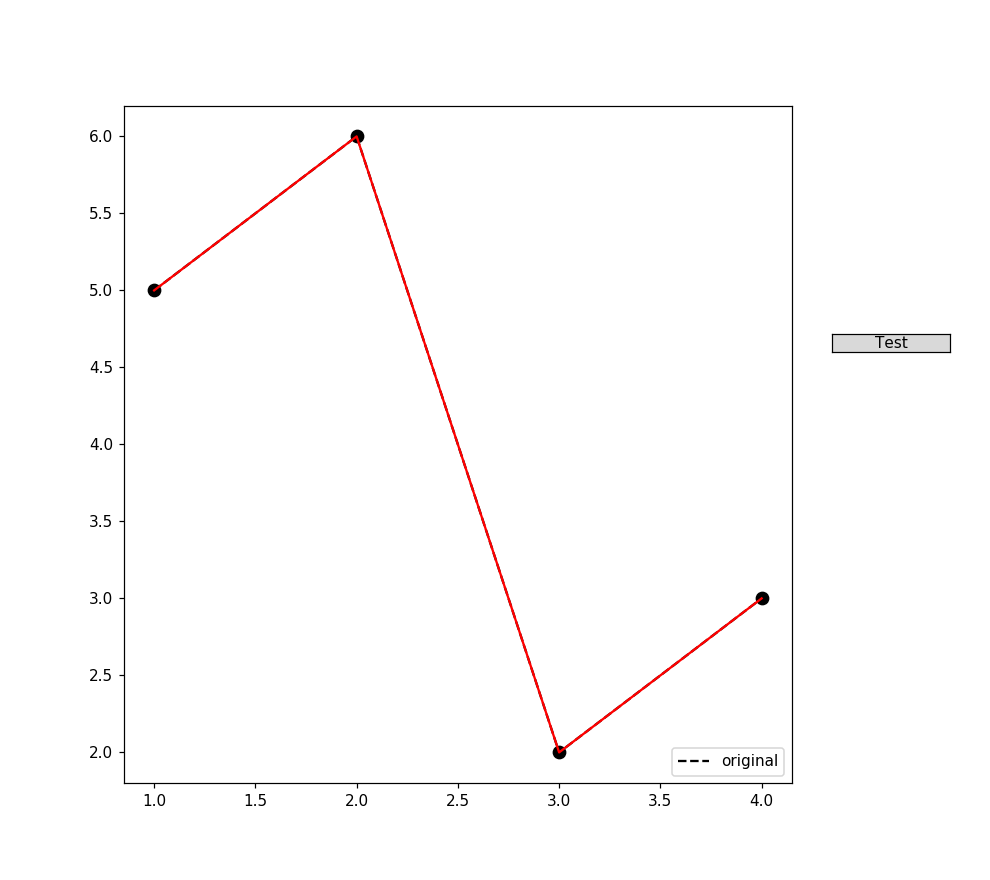

In [4]:
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import matplotlib as mpl
import numpy as np
from copy import copy

class Path(object):

    def __init__(self, xcoords, ycoords):

        self.xcoords = xcoords
        self.ycoords = ycoords
        self.original_xcoords = copy(xcoords)
        self.original_ycoords = copy(ycoords)
        self.pind = None  # active point
        self.epsilon = 5  # max pixel distance
        
        # figure.subplot.right
        mpl.rcParams['figure.subplot.right'] = 0.8

        # set up a plot
        self.fig, self.ax1 = plt.subplots(1, 1, figsize=(9.0, 8.0), sharex=True)

        self.ax1.plot(self.xcoords, self.ycoords, 'k--', label='original')

        self.l, = self.ax1.plot(self.xcoords, self.ycoords,
            color='k', linestyle='none',
            marker='o', markersize=8)

        self.m, = self.ax1.plot(self.xcoords, self.ycoords, 'r-')

        self.ax1.set_yscale('linear')
        self.ax1.legend(loc=4, prop={'size': 10})

        self.axres = plt.axes([0.84, 0.8-((self.original_xcoords.shape[0])*0.05), 0.12, 0.02])
        self.bres = Button(self.axres, 'Test')
        self.bres.on_clicked(self.reset)

        self.fig.canvas.mpl_connect('button_press_event', self.button_press_callback)
        self.fig.canvas.mpl_connect('button_release_event', self.button_release_callback)
        self.fig.canvas.mpl_connect('motion_notify_event', self.motion_notify_callback)

        plt.show()

    def reset(self, event):
        """ Reset the values """
        self.xcoords = self.original_xcoords
        self.ycoords = self.original_ycoords
        self.l.set_xdata(self.xcoords)
        self.m.set_xdata(self.xcoords)
        self.l.set_ydata(self.ycoords)
        self.m.set_ydata(self.ycoords)
        plt.draw()

    def button_press_callback(self, event):
        if event.inaxes is None:
            return
        if event.button != 1:
            return
        self.pind = self.get_ind_under_point(event)

    def button_release_callback(self, event):
        if event.button != 1:
            return
        self.pind = None

    def get_ind_under_point(self, event):
        """
           Get the index of the vertex under point if within epsilon tolerance
        """
        tinv = self.ax1.transData
        xr = np.reshape(self.xcoords, (np.shape(self.xcoords)[0], 1))
        yr = np.reshape(self.ycoords, (np.shape(self.ycoords)[0], 1))
        xy_vals = np.append(xr, yr, 1)
        xyt = tinv.transform(xy_vals)
        xt, yt = xyt[:, 0], xyt[:, 1]
        d = np.hypot(xt - event.x, yt - event.y)
        indseq, = np.nonzero(d == d.min())
        ind = indseq[0]

        if d[ind] >= self.epsilon:
            ind = None

        return ind

    def motion_notify_callback(self, event):
        'on mouse movement'
        if self.pind is None:
            return
        if event.inaxes is None:
            return
        if event.button != 1:
            return

        self.ycoords[self.pind] = event.ydata
        self.xcoords[self.pind] = event.xdata
        self.l.set_xdata(self.xcoords)
        self.m.set_xdata(self.xcoords)
        self.l.set_ydata(self.ycoords)
        self.m.set_ydata(self.ycoords)
        self.fig.canvas.draw_idle()


x = np.array([1,2,3,4])
y = np.array([5, 6, 2, 3])

%matplotlib notebook

A = Path(x, y)